In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
def sersicE(r, re, n, mtot):
    """
    Computes the Sersic profile for an elliptical galaxy in terms of effective radius re given a Sersic index
    n, total mass mtot, and radius r (can be a vector of radii). Assumes M/L = 1 (no dark matter)
    
    Inputs:
    -------
        r : 'float'
            Distance from the center of the galaxy (kpc)
        re : 'float'
            Effective radius (2D half-light radius) in (kpc)
        n : 'float'
            Sersic index
        mtot : 'float'
            Total stellar mass in Msun
    
    Returns:
    --------
        I : 'numpy array' of 'float'
            The surface brightness profile of the elliptical galaxy in Lsun/kpc^2
    """
    
    # Assume M/L = 1, so total luminosity is
    lum = mtot # Msun => Lsun, basically
    
    # Effective surface brightness
    Ie = lum / 7.2 / np.pi / re**2
    
    # Surface brightness - Sersic profile
    a = (r / re)**(1/n)
    b = -7.67 * (a-1)
    I = Ie * np.exp(b)
    
    # Return the surface brightness profile
    return I

# Part B

a) Create an instance of the MassProfile Class for M31. Store it as a variable `M31`. 


In [4]:
M31 = MassProfile('M31', 0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [5]:
r = np.arange(0.1, 30, 0.1)

c) Define a new array called `bulge_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `bulge_mass` by adding `.value` 


In [6]:
bulge_mass = M31.massEnclosed(3,r).value # 3 = bulge particles

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `bulge_I`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [7]:
bulge_I = bulge_mass / (4 * np.pi * r**2)

Really, the mass density profile should be computed in shells, not just cumululative / surface area as a function of r

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [8]:
# total mass of the bulge
bulge_total = ComponentMass("M31_000.txt", 3) * 1e12
print(f'{bulge_total:.2e}')

1.90e+10


In [9]:
# half the total bulge mass
b_half = bulge_total / 2
print(b_half)

9500000000.0


In [10]:
 # where is the bulge mass greater than b_half?
index = np.where(bulge_mass > b_half)
print(bulge_mass[index][0])

re_bulge = r[index][0]

9669363719.999996


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

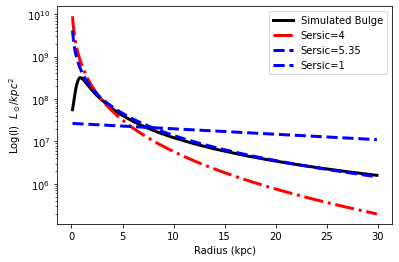

In [12]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig, ax = plt.subplots()


# plot the bulge mass density as a proxy for surface brighntess
plt.semilogy(r, bulge_I, color='black', linewidth=3, label='Simulated Bulge')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
plt.semilogy(r, sersicE(r, re_bulge, 4, bulge_total), color='red', linestyle='-.',
            linewidth=3, label='Sersic=4')
plt.semilogy(r, sersicE(r, re_bulge, 5.35, bulge_total), color='blue', linestyle='--',
            linewidth=3, label='Sersic=5.35')

plt.semilogy(r, sersicE(r, re_bulge*100, 1, bulge_total), color='blue', linestyle='--',
            linewidth=3, label='Sersic=1')



# Add axis labels
plt.xlabel('Radius (kpc)')
plt.ylabel('Log(I)  $L_\odot/kpc^2$')

# add a legend with some customizations.
legend = ax.legend(loc='upper right')


plt.savefig('Lab6.png')